# WSU size of computing estimate numbers

The goal here is to put together some numbers on the type of projects ALMA would process as part of the WSU to be used to produce a total size of computing estimate.

In [664]:
import numpy as np
import astropy.units as u
from ast import literal_eval
from astropy import constants as const
from matplotlib import pyplot as plt, ticker as mticker
import re
import math
from astropy.table import Table, QTable, vstack
from astropy import constants as const
from importlib import reload

## TOC

* [Read in Data](#readin)
* [Generate WSU DB](#wsu_db)

## Read in massaged cycle 7 and 8 data <a id="readin"></a>

In [665]:
cycle7tab = Table.read('result_table_cycle7_with_calc_values_20220914.csv')
cycle8tab = Table.read('result_table_cycle8_with_calc_values_20220914.csv')

In [704]:
cycle7_cycle8_tab = vstack([cycle7tab,cycle8tab])

Information that we already have:
* FOV
* resolution
* mosaic or not
* frequency
* image linear size
* number of baseline (7m vs. 12m)
* n polarizations

Information that I need to calculate for WSU:
* Bandwidth (16GHz for all receivers)
* channel width (follow procedure in data memo)
* nchan (calculate from bandwidth and channel width)
* dump time (is this just a 7m vs. 12m dichotomy). Looks like in her spreadsheet Crystal uses 3.024s for 12m and 10.08s for 7m.

The data rate memo calculated the number of channels two ways:
* finest spectral resolution across all spw for cycle 7 project [the writeup says sbs, but I think they mean spws. confirm with crystal?]
* fix resolution:
  * *> 10km/s* -> 10km/s
  * 1-10 km/s -> 1km/s
  * 0.1-1 km/s -> 0.1km/s
  * <0.1km/s -> 0.1km/s

How am I going to get to a fraction of projects? Using the time estimate doesn't seem right because the time for spectral scans will be drastically faster. What I can do is just count the number of MOUS'es and divide by the total.

Another question is what to do for projects with multiple targets? Just do the same thing for all targets. That might make sense since you usually want the same spectral setup for all your sources. But you might have a different mosaic size. Can I take largest? or average? That might be easiest.


## Put together WSU mous data base <a id="wsu_db"></a>

In [567]:
import wsu_db

In [670]:
reload(wsu_db)

<module 'wsu_db' from '/Users/akepley/Dropbox/Support/naasc/mitigation/wsu_db.py'>

In [671]:
result = wsu_db.create_database(cycle7tab)

mosaic and single pointings in same MOUS uid://A001/X1465/Xbc. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1465/Xc0. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X14c3/X129c. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X14c3/X12a2. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X14c3/X12a8. Setting mosaic to True


In [672]:
result_c8 = wsu_db.create_database(cycle8tab)

mosaic and single pointings in same MOUS uid://A001/X1590/X27c5. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X27cb. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X27d1. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X27d7. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X27dd. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X27e3. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X27e9. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X27ef. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X27f5. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X27fb. Setting mosaic to True
mosaic and single pointings in same MOUS uid://A001/X1590/X2801. Setting mosaic to True
mosaic and single pointings in s

In [ ]:
# save data bases if what's desired
result.writeto('')

In [673]:
result.columns

<TableColumns names=('mous','proposal_id','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','npol','wsu_freq','wsu_bandwidth_initial','wsu_bandwidth_final','wsu_bandwidth_spw','wsu_specwidth_finest','wsu_chanavg_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','tint','nbase_typical','nbase_array','nbase_all','wsu_nchan_initial_finest','wsu_nchan_initial_stepped','wsu_nchan_initial_stepped2','wsu_nchan_final_finest','wsu_nchan_final_stepped','wsu_nchan_final_stepped2','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','vis_rate_typical_initial_finest','vis_rate_typical_initial_stepped','vis_rate_typical_final_finest','vis_rate_typical_final_stepped','vis_rate_array_initial_finest','vis_rate_array_initial_stepped','vis_rate_array_final_finest','vis_rate_array_final_stepped','vis_rate_all_initial_finest','vis_rate_all_initial_stepped','vis_rate_all_f

In [674]:
len(result)

2717

In [74]:
idx = (result['mosaic'] == 'T') & (result['imsize'] >5800)
result['mous','imsize','cell','s_fov','s_resolution','wsu_freq','pb'][idx]

mous,imsize,cell,s_fov,s_resolution,wsu_freq,pb
,,,deg,arcsec,GHz,
str32,float64,float64,float64,float64,float64,float64
uid://A001/X1471/X313,8277.5,0.006952670050637091,0.01056278408537675,0.03476335025318546,223.75965364178407,26.039520237581446
uid://A001/X1471/X317,7895.0,0.007193344668357089,0.010440455664308955,0.035966723341785446,227.56311759987634,25.5974979187608
uid://A001/X1471/X31b,6000.0,0.006340537801652289,0.006994422567682404,0.031702689008261446,338.9565787793444,17.175818907103793


In [34]:
0.01056278408537675 *3600.0  

38.0260227073563

Image pre-check values for  2019.1.00796.S, uid://A001/X1471/X313	

* beam = 0.0420 x 0.0347 arcsec
* cell = 0.0069 x 0.0069 arcsec

eye balling the spatial set up it looks like there's 10-12arcsec between pointings and the plot says the primary beam is 26.0arcsec

The pipeline math is   

npts <= 3
* nxpix = int((1.65 * beam_radius_v + xspread) / cellx_v)

npts >3
* nxpix = int((1.5 * beam_radius_v + xspread) / cellx_v)

We only have two pointings there

unmitigated imsize calculated in pipeline for X317 is 7776, 7776 according to SCG tests


In [49]:
(26.0 + 10.0)

36.0

In [50]:
(1.65 * 26.0 + 10.0)/0.0069

7666.666666666667

So my estimate is a little on the low end, but not crazy

In [67]:
(0.01044*3600+25.6*0.75)/0.0072

7886.666666666667

In [65]:
1.54/2.0

0.77

## Imsize investigation

Something is  odd with my image sizes. I'm using 2019.1.01463.S uid://A001/X1465/Xc05 as my poster child

For the unmitigated imaging done by the pipeline, the pipeline calculates the following values:
* beam: 0.0322" x 0.0211"
* cell: 0.0042" x 0.0042"
* imsize: [11250, 11250] pixels
* FOV: 47.25 arcsec

Now let's look at what I get from my calculations

In [75]:
#2019.1.01463.S
idx =result['mous'] == 'uid://A001/X1465/Xc05'
result['mous','s_fov','s_resolution','imsize','wsu_nchan_final_stepped','wsu_nchan_final_finest','mosaic'][idx]

mous,s_fov,s_resolution,imsize,wsu_nchan_final_stepped,wsu_nchan_final_finest,mosaic
,deg,arcsec,,,,
str32,float64,float64,float64,float64,float64,str32
uid://A001/X1465/Xc05,0.007157768473981626,0.02247689719213381,8820.0,237037.03703703705,32921.81069958848,F


In [76]:
np.log10(237037.03703703705)

5.3748162098249

In [77]:
np.log10(32921.81069958848)

4.517483713393632

In [78]:
# the imsize is
0.007157768473981626*3600.00 # arcsec

25.767966506333853

In [79]:
# What's the estimated imsize at this frequency??
# frequency
freq = 218.821 #GHz
19.4*300/218.821

26.597081632932856

This is comparable to the imsize calculated above.

In [80]:
# What pixel size does this imply for five pixels per beam?
0.024588/5.0

0.004917599999999999

In [81]:
# What pixel size does this imply for six pixels per beam?
0.024588/6.0

0.004098

What happens if I use the points_per_fov value??

In [82]:
idx2 = cycle7tab['member_ous_uid'] == 'uid://A001/X1465/Xc05'
cycle7tab['proposal_id','member_ous_uid','s_fov','s_resolution','points_per_fov','spw_nchan','is_mosaic'][idx2]

proposal_id,member_ous_uid,s_fov,s_resolution,points_per_fov,spw_nchan,is_mosaic
str14,str22,float64,float64,float64,float64,str1
2019.1.01463.S,uid://A001/X1465/Xc05,0.007157768473981626,0.02247689719213381,1314279.023205167,3840.0,F
2019.1.01463.S,uid://A001/X1465/Xc05,0.007157768473981626,0.02247689719213381,1314279.023205167,3840.0,F
2019.1.01463.S,uid://A001/X1465/Xc05,0.007157768473981626,0.02247689719213381,1314279.023205167,3840.0,F
2019.1.01463.S,uid://A001/X1465/Xc05,0.007157768473981626,0.02247689719213381,1314279.023205167,3840.0,F


In [83]:
# imsize from points per fov value
np.sqrt(1100957.4775723005)*5.0

5246.326042032416

Matches imsize above.

So it looks like the FOV is the difference:

In [84]:
(47.25/25.76)*5250

9629.755434782608

Still an underestimate, but closer.

The pipeline calculates the primary beam as

primary_beam_size = \
            1.22 \
            * cqa.getvalue(cqa.convert(cqa.constants('c'), 'm/s')) \
            / ref_frequency \
            / smallest_diameter \
            * (180.0 * 3600.0 / math.pi)

In [85]:
1.22 * ((const.c.value /  218.821e9) / (12.0) )*(180*3600.0/math.pi)

28.729986526935694

Pipeline calculation is here:

beam_radius_v = primary_beam

beam_fwhp = 1.12 / 1.22 * beam_radius_v

nxpix = int(utils.round_half_up(1.1 * beam_fwhp * math.sqrt(-math.log(sfpblimit) / math.log(2.)) / cellx_v))

In [86]:
(1.12/1.22)* 28.73

26.37508196721312

In [87]:
1.1 * 26.38 * math.sqrt(-math.log(0.2) / math.log(2.0))

44.21726329202246

Okay. This is the value I get above. 

What's the constant??

In [88]:
1.1* (1.12/1.22)*math.sqrt(-math.log(0.2) / math.log(2.0))

1.53877549084208

In [89]:
1.54*25.8

39.732

In [90]:
40.0/0.0040

10000.0

## Making some preliminary plots

In [636]:
single_7m = (result['array'] == '7m') & (result['mosaic'] == 'F')
single_12m = (result['array'] == '12m') & (result['mosaic'] == 'F')
mosaic_7m = (result['array'] == '7m') & (result['mosaic'] == 'T')
mosaic_12m = (result['array'] == '12m') & (result['mosaic'] == 'T')

## I probably need to correct the imsize for the primary beam factor. That's a factor of 1.54
band2specscan = {'nchan':595200.0,
                 'imsize':10670.0,
                 'vis_rate_typical': 3063.86,
                 'vis_rate_array':4055.86,
                 'vis_rate_all':6079.54,
                'freq':75.0,
                'bandwidth':16.0}

band2specscan_500MBs = {'nchan':148800.0,
                 'imsize':10670.0,
                 'vis_rate_typical': 765.97,
                'freq':75.0,
                'bandwidth':16.0}

band2specscan_160MBs = {'nchan': 49600.0,
                 'imsize':10670.0,
                 'vis_rate_typical': 255.32,
                'freq':75.0,
                'bandwidth':16.0}

band2specscan['frac_bw'] = band2specscan['bandwidth']/band2specscan['freq']

In [637]:
def calc_max_nchan(imsize, cube_limit, chan_limit=80*14880):
    '''
    calculate maximum nchan for a given cube limit
  
    imsize: pixels
    limit: in GB
    '''
    
    nchan_max = cube_limit * 1e9 / (4.0*imsize**2)
    
    # if greater than wsu max set to wsu max
    if type(nchan_max) == float:
        if nchan_max > chan_limit:
            nchan_max =  chan_limit
    else:
        nchan_max[nchan_max > chan_limit] = chan_limit
        
    return nchan_max

In [640]:
calc_max_nchan(np.array([100,100000]),40)

array([1.e+06, 1.e+00])

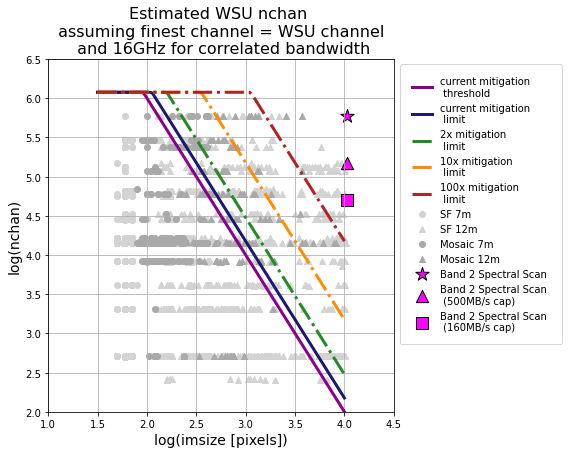

In [641]:
plt.figure(figsize=(8,7),edgecolor='white')
plt.subplot(111,position=[0.1,0.1,0.6,0.7])

cubelimit = 40 #GB
maxcube = 60 # GB
imsize = np.logspace(1.5,4.0,100)
mit_threshold = calc_max_nchan(imsize,cubelimit)
mit_limit = calc_max_nchan(imsize,maxcube)
mit_limit_2x = calc_max_nchan(imsize,maxcube*2.0)
mit_limit_10x = calc_max_nchan(imsize,maxcube*10.0)
mit_limit_100x = calc_max_nchan(imsize,maxcube*100.0)

plt.plot(np.log10(imsize),np.log10(mit_threshold),color='darkmagenta',linewidth=3,
         label='current mitigation \n threshold')
plt.plot(np.log10(imsize),np.log10(mit_limit),color='midnightblue',linewidth=3,
         label='current mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_2x),color='forestgreen',linewidth=3,
         linestyle="-.",
         label='2x mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_10x),color='darkorange',linewidth=3,
         linestyle='-.',
         label='10x mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_100x),color='firebrick',linewidth=3,
         linestyle="-.",
        label='100x mitigation \n limit')


plt.scatter(np.log10(result['imsize'][single_7m]),np.log10(result['wsu_nchan_final_finest'][single_7m]),
            label='SF 7m',marker='o',color='lightgrey')
plt.scatter(np.log10(result['imsize'][single_12m]),np.log10(result['wsu_nchan_final_finest'][single_12m]),
            label='SF 12m',marker='^',color='lightgrey')

plt.scatter(np.log10(result['imsize'][mosaic_7m]),np.log10(result['wsu_nchan_final_finest'][mosaic_7m]),
            label='Mosaic 7m',marker='o',color='darkgrey')
plt.scatter(np.log10(result['imsize'][mosaic_12m]),np.log10(result['wsu_nchan_final_finest'][mosaic_12m]),
            label='Mosaic 12m',marker='^',color='darkgrey')

plt.scatter(np.log10(band2specscan['imsize']), np.log10(band2specscan['nchan']), label="Band 2 Spectral Scan", 
            color='magenta',marker='*',s=200,edgecolor='black')

plt.scatter(np.log10(band2specscan_500MBs['imsize']), np.log10(band2specscan_500MBs['nchan']), 
            label="Band 2 Spectral Scan \n (500MB/s cap)", 
            color='magenta',marker='^',s=150,edgecolor='black')

plt.scatter(np.log10(band2specscan_160MBs['imsize']), np.log10(band2specscan_160MBs['nchan']), 
            label="Band 2 Spectral Scan \n (160MB/s cap)", 
            color='magenta',marker='s',s=150,edgecolor='black')


plt.xlim(1.0,4.5)
plt.ylim(2,6.5)
plt.xlabel('log(imsize [pixels])',size=14)
plt.ylabel('log(nchan)',size=14)
plt.title('Estimated WSU nchan \n assuming finest channel = WSU channel \n and 16GHz for correlated bandwidth',size=16)
plt.grid(which='both')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.0),borderpad=1.2)

plt.savefig('nchan_vs_imsize_finest.png',transparent=False,facecolor='white')

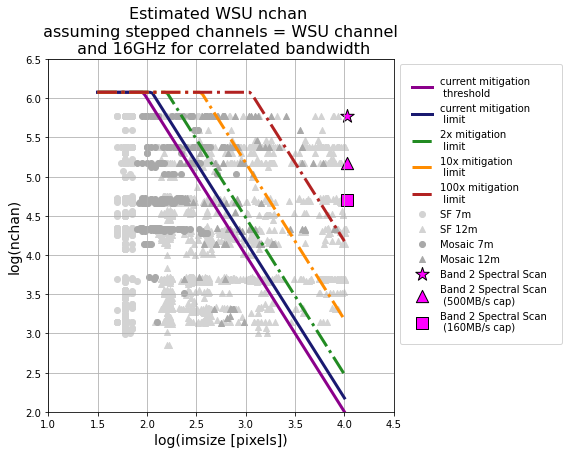

In [95]:
plt.figure(figsize=(8,7),edgecolor='white')
plt.subplot(111,position=[0.1,0.1,0.6,0.7])


cubelimit = 40 #GB
maxcube = 60 # GB
imsize = np.logspace(1.5,4.0,100)
mit_threshold = calc_max_nchan(imsize,cubelimit)
mit_limit = calc_max_nchan(imsize,maxcube)

mit_limit = calc_max_nchan(imsize,maxcube)
mit_limit_2x = calc_max_nchan(imsize,maxcube*2.0)
mit_limit_10x = calc_max_nchan(imsize,maxcube*10.0)
mit_limit_100x = calc_max_nchan(imsize,maxcube*100.0)

plt.plot(np.log10(imsize),np.log10(mit_threshold),color='darkmagenta',linewidth=3,
         label='current mitigation \n threshold')
plt.plot(np.log10(imsize),np.log10(mit_limit),color='midnightblue',linewidth=3,
         label='current mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_2x),color='forestgreen',linewidth=3,
         linestyle="-.",
         label='2x mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_10x),color='darkorange',linewidth=3,
         linestyle='-.',
         label='10x mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_100x),color='firebrick',linewidth=3,
         linestyle="-.",
        label='100x mitigation \n limit')

plt.scatter(np.log10(result['imsize'][single_7m]),np.log10(result['wsu_nchan_final_stepped'][single_7m]),
            label='SF 7m', marker='o',color='lightgrey')
plt.scatter(np.log10(result['imsize'][single_12m]),np.log10(result['wsu_nchan_final_stepped'][single_12m]),
            label='SF 12m',marker='^',color='lightgrey')

plt.scatter(np.log10(result['imsize'][mosaic_7m]),np.log10(result['wsu_nchan_final_stepped'][mosaic_7m]),
            label='Mosaic 7m',marker='o',color='darkgrey')
plt.scatter(np.log10(result['imsize'][mosaic_12m]),np.log10(result['wsu_nchan_final_stepped'][mosaic_12m]),
            label='Mosaic 12m',marker='^',color='darkgrey')

#plt.xscale('log')
#plt.yscale('log')

plt.scatter(np.log10(band2specscan['imsize']), np.log10(band2specscan['nchan']), label="Band 2 Spectral Scan", 
            color='magenta',marker='*',s=200,edgecolor='black')

plt.scatter(np.log10(band2specscan_500MBs['imsize']), np.log10(band2specscan_500MBs['nchan']), 
            label="Band 2 Spectral Scan \n (500MB/s cap)", 
            color='magenta',marker='^',s=150,edgecolor='black')

plt.scatter(np.log10(band2specscan_160MBs['imsize']), np.log10(band2specscan_160MBs['nchan']), 
            label="Band 2 Spectral Scan \n (160MB/s cap)", 
            color='magenta',marker='s',s=150,edgecolor='black')

plt.xlim(1.0,4.5)
plt.ylim(2,6.5)

plt.xlabel('log(imsize [pixels])',size=14)
plt.ylabel('log(nchan)',size=14)
plt.title('Estimated WSU nchan \n assuming stepped channels = WSU channel \n and 16GHz for correlated bandwidth',size=16)
plt.grid(which='both')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.0),borderpad=1.2)

plt.savefig('nchan_vs_imsize_stepped.png',transparent=False,facecolor='white')

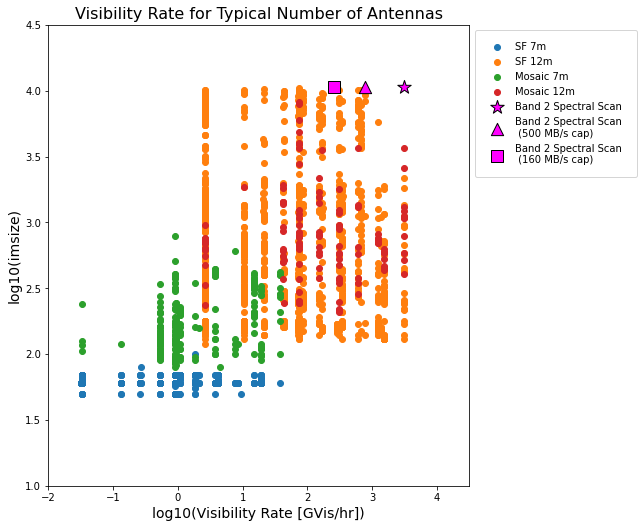

In [642]:
plt.figure(figsize=(9,8))
plt.subplot(111,position=[0.1,0.1,0.65,0.8])

plt.scatter(np.log10(result['vis_rate_typical_final_finest'][single_7m].value),np.log10(result['imsize'][single_7m]),
            label='SF 7m')
plt.scatter(np.log10(result['vis_rate_typical_final_finest'][single_12m].value),np.log10(result['imsize'][single_12m]),
            label='SF 12m')

plt.scatter(np.log10(result['vis_rate_typical_final_finest'][mosaic_7m].value),
            np.log10(result['imsize'][mosaic_7m]),
            label='Mosaic 7m')
plt.scatter(np.log10(result['vis_rate_typical_final_finest'][mosaic_12m].value),
            np.log10(result['imsize'][mosaic_12m]),
            label='Mosaic 12m')

plt.scatter(np.log10(band2specscan['vis_rate_typical']), 
            np.log10(band2specscan['imsize']), 
            label="Band 2 Spectral Scan", 
            color='magenta',marker='*',s=200, edgecolor='black')

plt.scatter(np.log10(band2specscan_500MBs['vis_rate_typical']), 
            np.log10(band2specscan_500MBs['imsize']), 
            label="Band 2 Spectral Scan \n (500 MB/s cap)", 
            color='magenta',marker='^',s=150, edgecolor='black')

plt.scatter(np.log10(band2specscan_160MBs['vis_rate_typical']), 
            np.log10(band2specscan_160MBs['imsize']), 
            label="Band 2 Spectral Scan \n (160 MB/s cap)", 
            color='magenta',marker='s',s=150, edgecolor='black')

#plt.xscale('log')
#plt.yscale('log')
plt.ylim(1.0,4.5)
plt.xlim(-2.0,4.5)
plt.xlabel('log10(Visibility Rate [GVis/hr])',size=14)
plt.ylabel('log10(imsize)',size=14)
plt.title('Visibility Rate for Typical Number of Antennas',size=16)
plt.legend(loc='upper right',bbox_to_anchor=(1.41,1.0),borderpad=1.2)


plt.savefig('visrate_vs_imsize_typical_finest.png',transparent=False,facecolor='white')

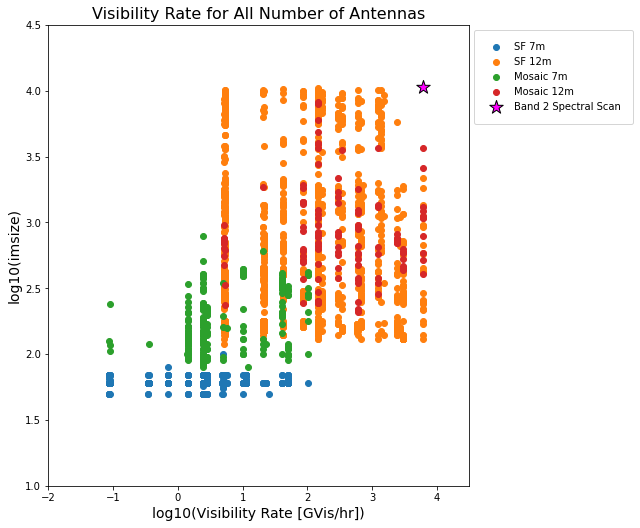

In [643]:
plt.figure(figsize=(9,8))
plt.subplot(111,position=[0.1,0.1,0.65,0.8])


plt.scatter(np.log10(result['vis_rate_all_final_finest'][single_7m].value),np.log10(result['imsize'][single_7m]),
            label='SF 7m')
plt.scatter(np.log10(result['vis_rate_all_final_finest'][single_12m].value),np.log10(result['imsize'][single_12m]),
            label='SF 12m')

plt.scatter(np.log10(result['vis_rate_all_final_finest'][mosaic_7m].value),
            np.log10(result['imsize'][mosaic_7m]),
            label='Mosaic 7m')
plt.scatter(np.log10(result['vis_rate_all_final_finest'][mosaic_12m].value),
            np.log10(result['imsize'][mosaic_12m]),
            label='Mosaic 12m')

plt.scatter(np.log10(band2specscan['vis_rate_all']), 
            np.log10(band2specscan['imsize']), 
            label="Band 2 Spectral Scan", 
            color='magenta',marker='*',s=200,edgecolor='black')

#plt.xscale('log')
#plt.yscale('log')

plt.ylim(1.0,4.5)
plt.xlim(-2.0,4.5)

plt.xlabel('log10(Visibility Rate [GVis/hr])',size=14)
plt.ylabel('log10(imsize)',size=14)
plt.title('Visibility Rate for All Number of Antennas',size=16)
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1.0),borderpad=1.2)

plt.savefig('visrate_vs_imsize_all_finest.png',transparent=False,facecolor='white')

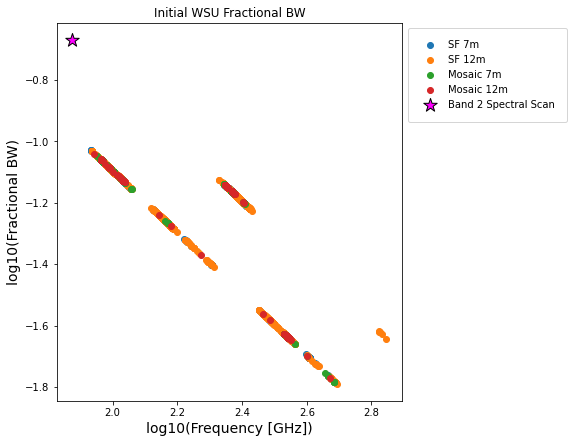

In [644]:
plt.figure(figsize=(8,7))

plt.subplot(111,position=[0.1,0.1,0.60,0.75])


plt.scatter(np.log10(result['wsu_freq'][single_7m].value),np.log10(result['frac_bw_initial'][single_7m].value),
            label='SF 7m')
plt.scatter(np.log10(result['wsu_freq'][single_12m].value),np.log10(result['frac_bw_initial'][single_12m].value),
            label='SF 12m')

plt.scatter(np.log10(result['wsu_freq'][mosaic_7m].value),np.log10(result['frac_bw_initial'][mosaic_7m].value),
            label='Mosaic 7m')
plt.scatter(np.log10(result['wsu_freq'][mosaic_12m].value),np.log10(result['frac_bw_initial'][mosaic_12m].value),
            label='Mosaic 12m')

#plt.xscale('log')
#plt.yscale('log')


plt.scatter(np.log10(band2specscan['freq']), 
            np.log10(band2specscan['frac_bw']), 
            label="Band 2 Spectral Scan", 
            color='magenta',marker='*',s=200, edgecolor='black')

plt.xlabel('log10(Frequency [GHz])',size=14)
plt.ylabel('log10(Fractional BW)',size=14)
plt.title('Initial WSU Fractional BW')

plt.legend(loc='upper right',bbox_to_anchor=(1.49,1.0),borderpad=1.2)

plt.savefig('freq_vs_fracbw_initial.png',transparent=False,facecolor='white')

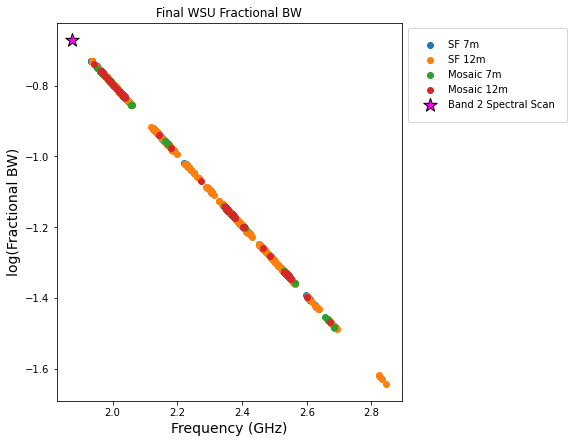

In [645]:
plt.figure(figsize=(8,7))

plt.subplot(111,position=[0.1,0.1,0.60,0.75])


plt.scatter(np.log10(result['wsu_freq'][single_7m].value),np.log10(result['frac_bw_final'][single_7m].value),
            label='SF 7m')
plt.scatter(np.log10(result['wsu_freq'][single_12m].value),np.log10(result['frac_bw_final'][single_12m].value),
            label='SF 12m')

plt.scatter(np.log10(result['wsu_freq'][mosaic_7m].value),np.log10(result['frac_bw_final'][mosaic_7m].value),
            label='Mosaic 7m')
plt.scatter(np.log10(result['wsu_freq'][mosaic_12m].value),np.log10(result['frac_bw_final'][mosaic_12m].value),
            label='Mosaic 12m')


plt.scatter(np.log10(band2specscan['freq']), 
            np.log10(band2specscan['frac_bw']), 
            label="Band 2 Spectral Scan", 
            color='magenta',marker='*',s=200, edgecolor='black')

plt.xlabel('Frequency (GHz)',size=14)
plt.ylabel('log(Fractional BW)',size=14)
plt.title('Final WSU Fractional BW')

plt.legend(loc='upper right',bbox_to_anchor=(1.49,1.0),borderpad=1.2)

plt.savefig('freq_vs_fracbw_final.png',transparent=False,facecolor='white')

## Add Urvashi's calculations to plot

In [100]:
## Calculate the memory used per image plane, given imsize.  
##    Assume float precision.  
##  (Double precision and Complex valued images will be integral multiples
##   of this basic unit)

## Return mem size in GB
def mem_per_plane(ims):
    size_float = 4  # bytes
    bytes_per_gb = 1024*1024*1024.0
    one_plane = (ims * ims * 1 * size_float) / bytes_per_gb
    return one_plane


In [444]:
## Calculate the total number of iterations, per chunk, per minorcycle set 
## as a function of imsize and nchan per chunk 
## Niter per process is a proxy for minor cycle compute load, for scaling purposes.

## The defaults reflect the ALMA Cycle 7 range of imsizes and nchans

def calc_minor(log_imsize = np.arange(1.5,4.1,0.1), 
               log_nchan = np.arange(3.0,6.1,0.1),
               nproc=100, 
               mem_per_proc=4,
               plotit=True):
    """
    log_imsize = A list of log(imsize) values to cover the range of interest
                 Note that npixels = imsize**2
    log_nchan = A list of log(nchan) values to cover the range of interest
    nproc : Number of processors across which to divide the work
    mem_per_proc : GB : Available memory per processor
    """   
    #    Initialize grids to evaluate metrics for all combinations of imsize, nchan
    imsize, nchan = np.meshgrid( 10**(log_imsize), 10**(log_nchan))
    
    #############################################################################
    # 1 # Number of iterations per chan, in one set of minorcycle iterations
    #############################################################################
    #     Assume there is flux in a quarter of the image, 
    #     and 100 iterations are needed per pixel in that inner quarter
    #     This is an overkill, but it can happen.
    niter_per_chan = 0.25 *100  * imsize**2  

    #############################################################################
    # 2 # Calculate the number of channels per chunk 
    #############################################################################
    #     Two criteria determine the number of channels per chunk. 
    #      (a) The number of image planes that fit in the available memory per process
    #      (b) The number of processors available for parallel compute.
    
    # (a)  We need about 10 copies of float-images per plane, per imaging run. 
    mem_chan = 10 * mem_per_plane(imsize)  
    #      Calculate nchan_per_chunk. For small nchan, it could be all of nchan. 
    nchan_per_chunk_memory = np.minimum( mem_per_proc / mem_chan, nchan)
    
    # (b) Try to use all the available processors
    nchan_per_chunk_compute = nchan/nproc
    
    #     The actual number of channels per chunk is the minimum of (a) and (b)
    #     because the chunks need to fit in memory, and it is ok to have more 
    #     chunks than processes.
    nchan_per_chunk = np.minimum(nchan_per_chunk_memory, nchan_per_chunk_compute)
    
    #############################################################################
    # 3 # Calculate the number of iterations per chunk (in units of 1M)
    #############################################################################
    niter_m = niter_per_chan * nchan_per_chunk / 1e+6
    
    ############################################################################
    # 4 # Plot it.... 
    #############################################################################
    if plotit:
        fig, axs = plt.subplots(1,3, figsize=(20,5))
        i=0
        for ax in axs:
            if i==0:
                img = ax.imshow(np.sqrt(niter_m),origin='lower',cmap='jet',extent=[min(log_imsize),max(log_imsize),min(log_nchan),max(log_nchan)])
                ax.set_title('niter_per_chunk/1e+6\n(nproc=%d, mem_per_proc=%d GB )'%(nproc,mem_per_proc) )
            if i==1:
                img = ax.imshow(np.sqrt(nchan_per_chunk)/1e+3,origin='lower',cmap='jet',extent=[min(log_imsize),max(log_imsize),min(log_nchan),max(log_nchan)])
                ax.set_title('nchan_per_chunk/1e+3\n(nproc=%d, mem_per_proc=%d GB )'%(nproc,mem_per_proc) )
#            img = ax.imshow(sqrt(nchan_per_chunk_memory)/1e+3,origin='lower',cmap='jet',extent=[min(log_imsize),max(log_imsize),min(log_nchan),max(log_nchan)])
#            ax.set_title('nchan_per_chunk_memory/1e+3\n(nproc=%d, mem_per_proc=%d GB )'%(nproc,mem_per_proc) )
            if i==2:
                img = ax.imshow(np.sqrt(niter_per_chan)/1e+6,origin='lower',cmap='jet',extent=[min(log_imsize),max(log_imsize),min(log_nchan),max(log_nchan)])
                ax.set_title('niter_per_chan/1e+6\n(nproc=%d, mem_per_proc=%d GB )'%(nproc,mem_per_proc) )
#            img = ax.imshow(sqrt(nchan_per_chunk_compute)/1e+3,origin='lower',cmap='jet',extent=[min(log_imsize),max(log_imsize),min(log_nchan),max(log_nchan)])
#            ax.set_title('nchan_per_chunk_compute/1e+3\n(nproc=%d, mem_per_proc=%d GB )'%(nproc,mem_per_proc) )
            
            ax.set_xticks(log_imsize)
            ax.set_yticks(log_nchan)
            plt.colorbar(img,ax=ax)
            ax.set_xlabel('log(imsize)')
            ax.set_ylabel('log(nchan)')
            i=i+1
    
    return niter_m

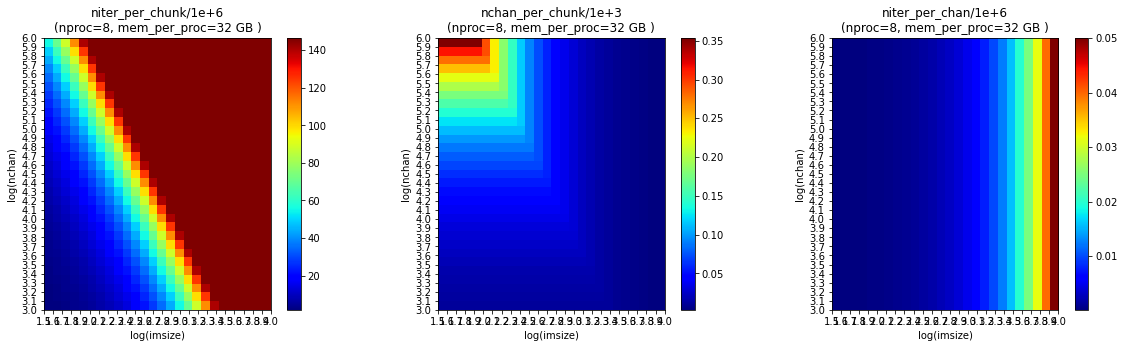

In [102]:
# standard nodes used in operations
nrecs_jao = calc_minor(nproc=8, mem_per_proc=32)

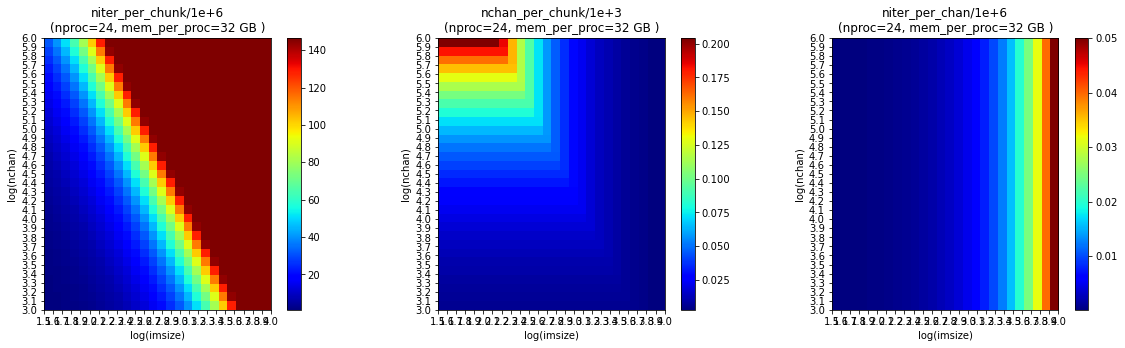

In [103]:
# big PLWG nodes: 768 GB mem and 24 processors
nrecs_bigplwg = calc_minor(nproc=24, mem_per_proc=32)

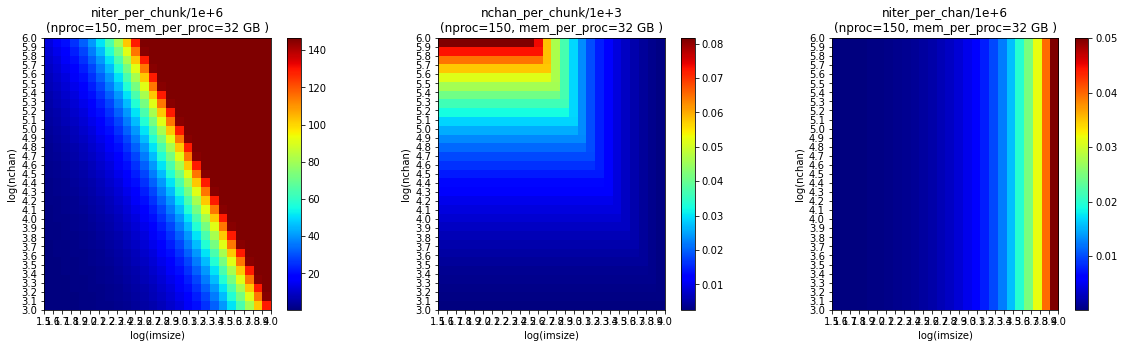

In [438]:
nrecs_150nodes_32GB = calc_minor(nproc=150, mem_per_proc=32)

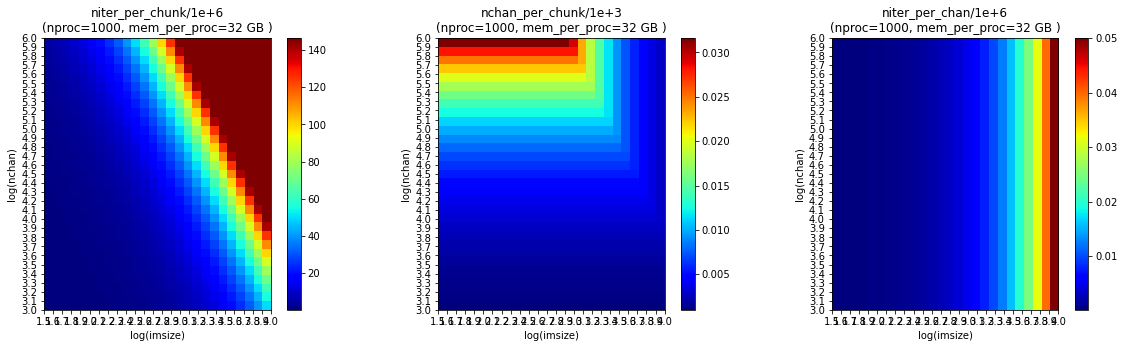

In [104]:
# theoretical nodes!!!
nrecs_1000nodes_32GB = calc_minor(nproc=1000, mem_per_proc=32)

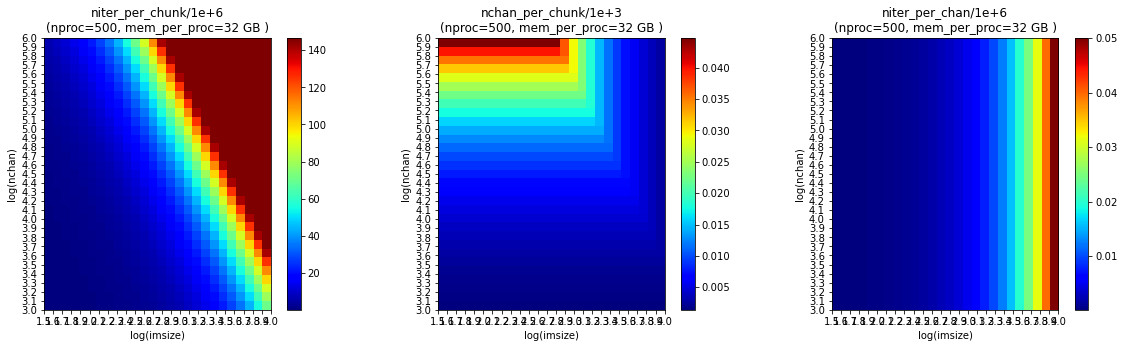

In [105]:
# theoretical nodes!!!
nrecs_500nodes_32GB = calc_minor(nproc=500, mem_per_proc=32)

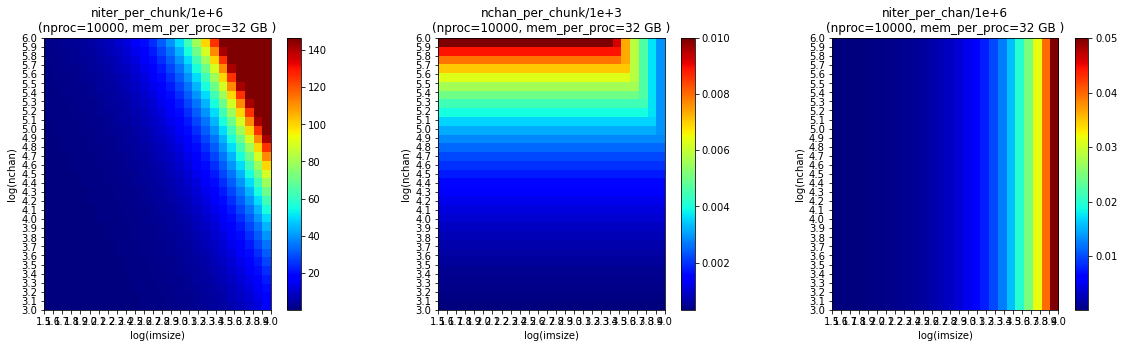

In [106]:
# theoretical magical nodes!!!
nrecs_10000nodes_32GB = calc_minor(nproc=10000, mem_per_proc=32)

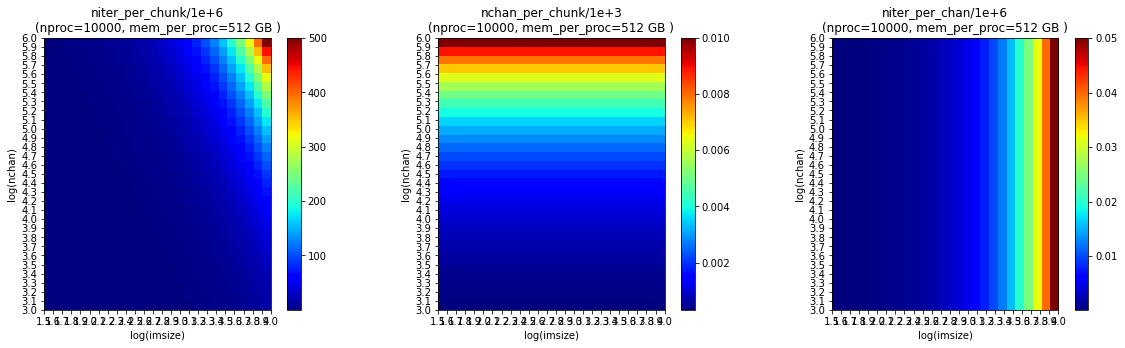

In [107]:
# theoretical super magical nodes!!!
nrecs_10000nodes_512GB = calc_minor(nproc=10000, mem_per_proc=512)

In [430]:
log_imsize = np.arange(1.5,4.1,0.1)
log_nchan = np.arange(3.0,6.1,0.1)

### trying with regular nodes

<ipython-input-646-32ab48a8c183>:65: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(log_imsize,log_nchan,np.sqrt(nrecs_jao) , levels=[146],colors='black', label='8 nodes/32GB')
<ipython-input-646-32ab48a8c183>:66: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(log_imsize,log_nchan,np.sqrt(mit2x_proc) , levels=[146], colors='red', label='24 nodes/32GB')
<ipython-input-646-32ab48a8c183>:67: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(log_imsize,log_nchan,np.sqrt(mit10x_proc) , levels=[146], colors='green', label='150 nodes/32GB')
<ipython-input-646-32ab48a8c183>:68: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(log_imsize,log_nchan,np.sqrt(mit100x_proc) , levels=[146], colors='orange', label='1500 nodes/32GB')
<ipython-input-646-32ab48a8c183>:69: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(log_imsize,log_ncha

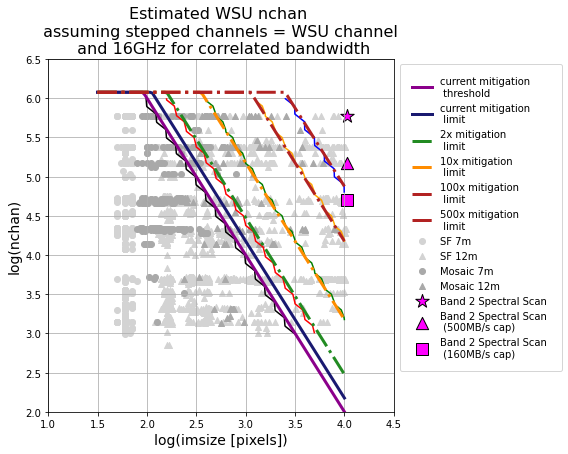

In [646]:
plt.figure(figsize=(8,7),edgecolor='white')
plt.subplot(111,position=[0.1,0.1,0.6,0.7])


cubelimit = 40 #GB
maxcube = 60 # GB
imsize = np.logspace(1.5,4.0,100)
mit_threshold = calc_max_nchan(imsize,cubelimit)
mit_limit = calc_max_nchan(imsize,maxcube)

mit_limit_2x = calc_max_nchan(imsize,maxcube*2.0)
mit_limit_10x = calc_max_nchan(imsize,maxcube*10.0)
mit_limit_100x = calc_max_nchan(imsize,maxcube*100.0)
mit_limit_500x = calc_max_nchan(imsize,maxcube*500.0)

plt.plot(np.log10(imsize),np.log10(mit_threshold),color='darkmagenta',linewidth=3,
         label='current mitigation \n threshold')
plt.plot(np.log10(imsize),np.log10(mit_limit),color='midnightblue',linewidth=3,
         label='current mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_2x),color='forestgreen',linewidth=3,
         linestyle="-.",
         label='2x mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_10x),color='darkorange',linewidth=3,
         linestyle='-.',
         label='10x mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_100x),color='firebrick',linewidth=3,
         linestyle="-.",
        label='100x mitigation \n limit')
plt.plot(np.log10(imsize),np.log10(mit_limit_500x),color='firebrick',linewidth=3,
         linestyle="-.",
        label='500x mitigation \n limit')


plt.scatter(np.log10(result['imsize'][single_7m]),np.log10(result['wsu_nchan_final_stepped'][single_7m]),
            label='SF 7m', marker='o',color='lightgrey')
plt.scatter(np.log10(result['imsize'][single_12m]),np.log10(result['wsu_nchan_final_stepped'][single_12m]),
            label='SF 12m',marker='^',color='lightgrey')

plt.scatter(np.log10(result['imsize'][mosaic_7m]),np.log10(result['wsu_nchan_final_stepped'][mosaic_7m]),
            label='Mosaic 7m',marker='o',color='darkgrey')
plt.scatter(np.log10(result['imsize'][mosaic_12m]),np.log10(result['wsu_nchan_final_stepped'][mosaic_12m]),
            label='Mosaic 12m',marker='^',color='darkgrey')

#plt.xscale('log')
#plt.yscale('log')

plt.scatter(np.log10(band2specscan['imsize']), np.log10(band2specscan['nchan']), label="Band 2 Spectral Scan", 
            color='magenta',marker='*',s=200,edgecolor='black')

plt.scatter(np.log10(band2specscan_500MBs['imsize']), np.log10(band2specscan_500MBs['nchan']), 
            label="Band 2 Spectral Scan \n (500MB/s cap)", 
            color='magenta',marker='^',s=150,edgecolor='black')

plt.scatter(np.log10(band2specscan_160MBs['imsize']), np.log10(band2specscan_160MBs['nchan']), 
            label="Band 2 Spectral Scan \n (160MB/s cap)", 
            color='magenta',marker='s',s=150,edgecolor='black')

nrecs_jao = calc_minor(nproc=8, mem_per_proc=32,plotit=False)
mit2x_proc = calc_minor(nproc=24, mem_per_proc=32,plotit=False)
mit10x_proc = calc_minor(nproc=150, mem_per_proc=32,plotit=False)
mit100x_proc = calc_minor(nproc=1500, mem_per_proc=32, plotit=False)
mit500x_proc = calc_minor(nproc=7000, mem_per_proc=32, plotit=False)


plt.contour(log_imsize,log_nchan,np.sqrt(nrecs_jao) , levels=[146],colors='black', label='8 nodes/32GB')
plt.contour(log_imsize,log_nchan,np.sqrt(mit2x_proc) , levels=[146], colors='red', label='24 nodes/32GB')
plt.contour(log_imsize,log_nchan,np.sqrt(mit10x_proc) , levels=[146], colors='green', label='150 nodes/32GB')
plt.contour(log_imsize,log_nchan,np.sqrt(mit100x_proc) , levels=[146], colors='orange', label='1500 nodes/32GB')
plt.contour(log_imsize,log_nchan,np.sqrt(mit500x_proc) , levels=[146], colors='blue', label='7000 nodes/32GB')
#plt.contour(log_imsize,log_nchan,np.sqrt(nrecs_10000nodes_512GB) , levels=[450],colors='purple', label='10000 nodes/512GB')


plt.xlim(1.0,4.5)
plt.ylim(2,6.5)

plt.xlabel('log(imsize [pixels])',size=14)
plt.ylabel('log(nchan)',size=14)
plt.title('Estimated WSU nchan \n assuming stepped channels = WSU channel \n and 16GHz for correlated bandwidth',size=16)
plt.grid(which='both')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.0),borderpad=1.2)


## Making density plots

In [112]:
import large_cubes

In [675]:
reload(large_cubes)

<module 'large_cubes' from '/Users/akepley/Dropbox/Support/naasc/mitigation/large_cubes.py'>

In [676]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (2.8, 5.8)
log_nchan_step = 0.1

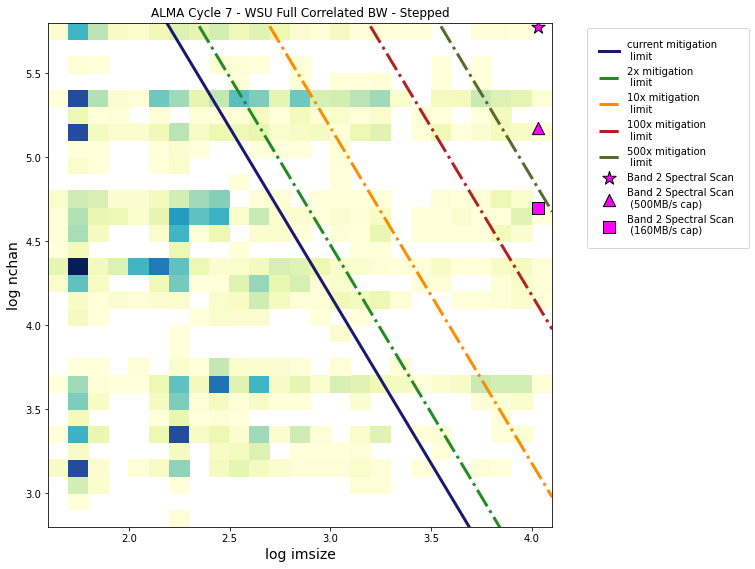

In [678]:
h, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result, 
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            cycle = '7 - WSU Full Correlated BW - Stepped')

Limit   Number    Fraction
1 2039.0 0.75046006624954
2 2135.0 0.7857931542142068
10 2378.0 0.87523003312477
100 2589.0 0.9528892160471107
500 2678.0 0.9856459330143541


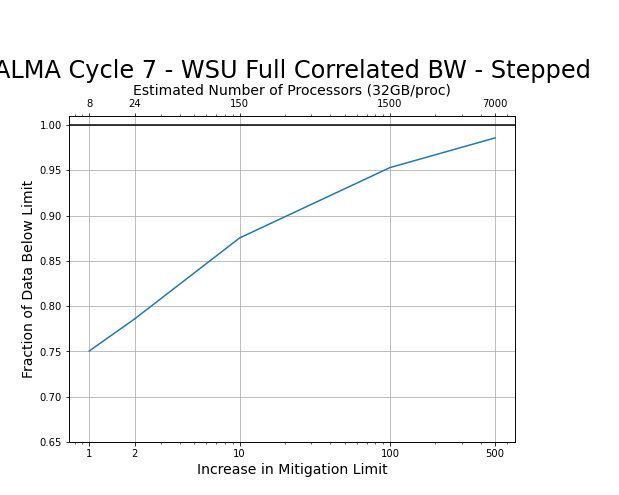

In [686]:
reload(large_cubes)
large_cubes.calc_cumulative_hist(h,
                     mit_limits =  np.array([1,2,10,100,500]),
                     log_imsize_range = log_imsize_range, 
                     log_imsize_step = log_imsize_step,
                     log_nchan_range = log_nchan_range,
                     log_nchan_step = log_nchan_step,
                     cycle = '7 - WSU Full Correlated BW - Stepped')

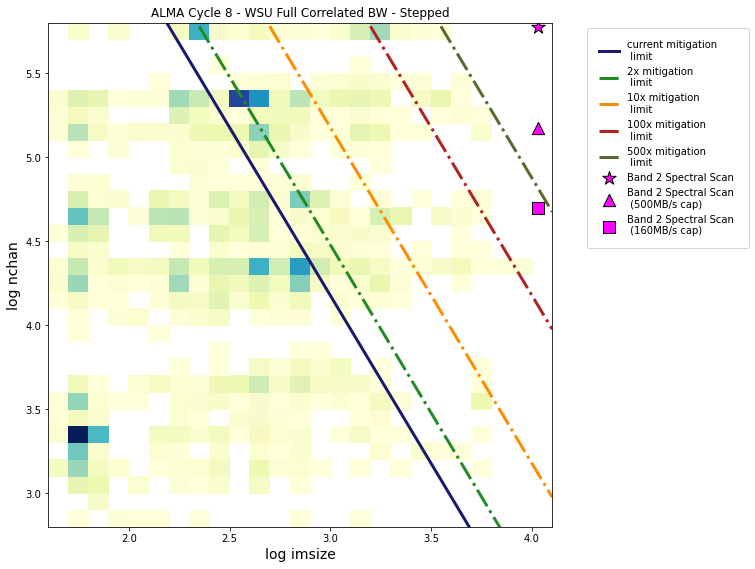

In [682]:
h_c8, xedges_c8, yedges_c8 = large_cubes.make_imsize_vs_nchan_hist2d(result_c8, 
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            cycle='8 - WSU Full Correlated BW - Stepped')

Limit   Number    Fraction
1 1679.0 0.696969696969697
2 1920.0 0.797011207970112
10 2185.0 0.9070153590701536
100 2377.0 0.9867164798671648
500 2409.0 1.0


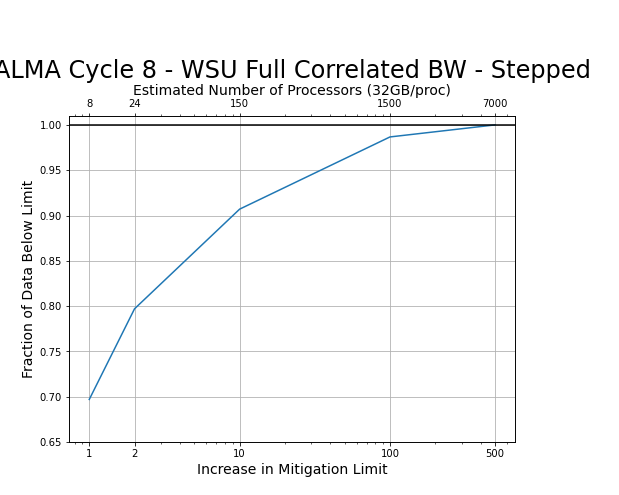

In [685]:
large_cubes.calc_cumulative_hist(h_c8,
                     mit_limits =  np.array([1,2,10,100,500]),
                     log_imsize_range = log_imsize_range, 
                     log_imsize_step = log_imsize_step,
                     log_nchan_range = log_nchan_range,
                     log_nchan_step = log_nchan_step, cycle='8 - WSU Full Correlated BW - Stepped')

In [584]:
from astropy.table import Table,vstack

In [687]:
result_c7_c8 = vstack([result, result_c8])

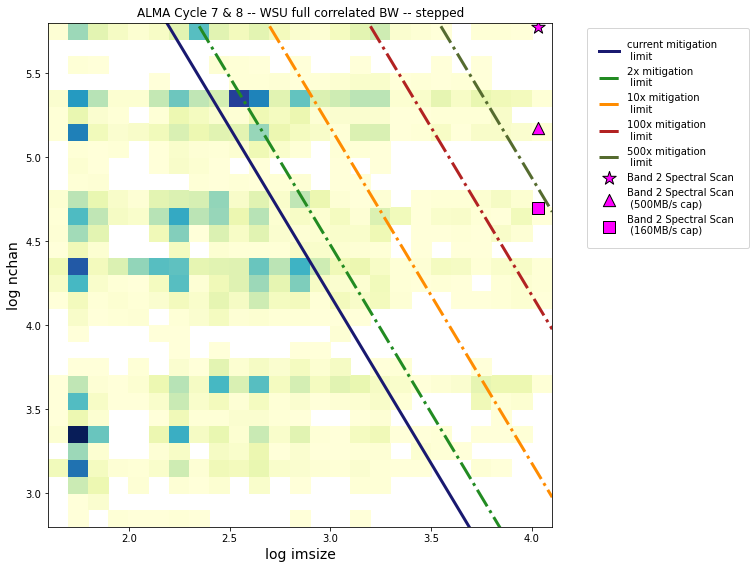

In [689]:
h_c7_c8, xedges_c7_c8, yedges_c7_c8 = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            cycle='7 & 8 -- WSU full correlated BW -- stepped')

Limit   Number    Fraction
1 3718.0 0.7253218884120172
2 4055.0 0.7910651580179477
10 4563.0 0.890167772142021
100 4966.0 0.9687865782286383
500 5087.0 0.9923917284432305


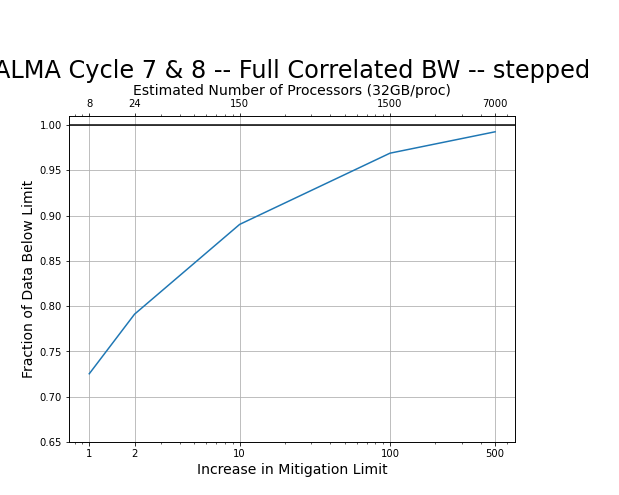

In [690]:
large_cubes.calc_cumulative_hist(h_c7_c8,
                     mit_limits =  np.array([1,2,10,100,500]),
                     log_imsize_range = log_imsize_range, 
                     log_imsize_step = log_imsize_step,
                     log_nchan_range = log_nchan_range,
                     log_nchan_step = log_nchan_step, cycle='7 & 8 -- Full Correlated BW -- stepped')

In [692]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (2.8, 5.8)
log_nchan_step = 0.1

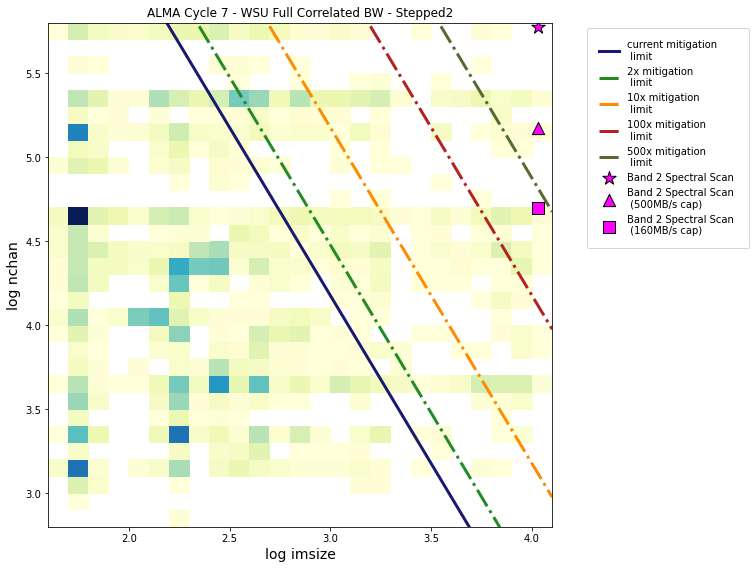

In [693]:
h, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result, 
                                                            chan_type='wsu_nchan_final_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            cycle = '7 - WSU Full Correlated BW - Stepped2')

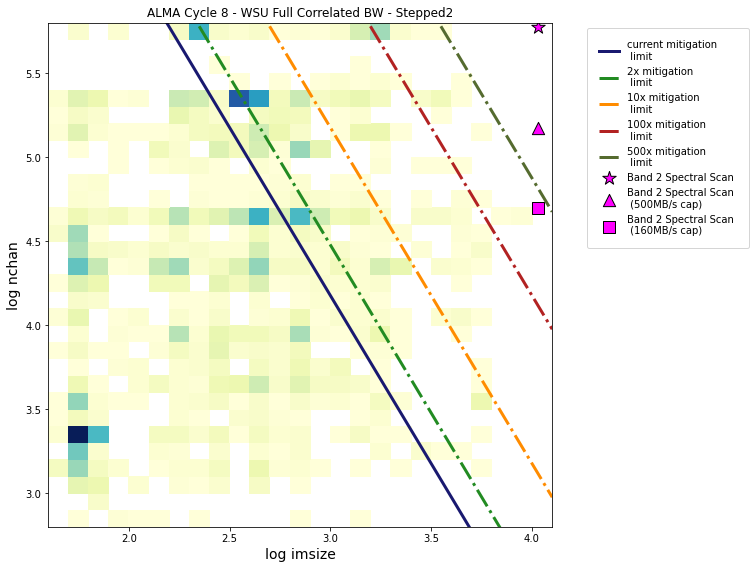

In [694]:
h, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c8, 
                                                            chan_type='wsu_nchan_final_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            cycle = '8 - WSU Full Correlated BW - Stepped2')

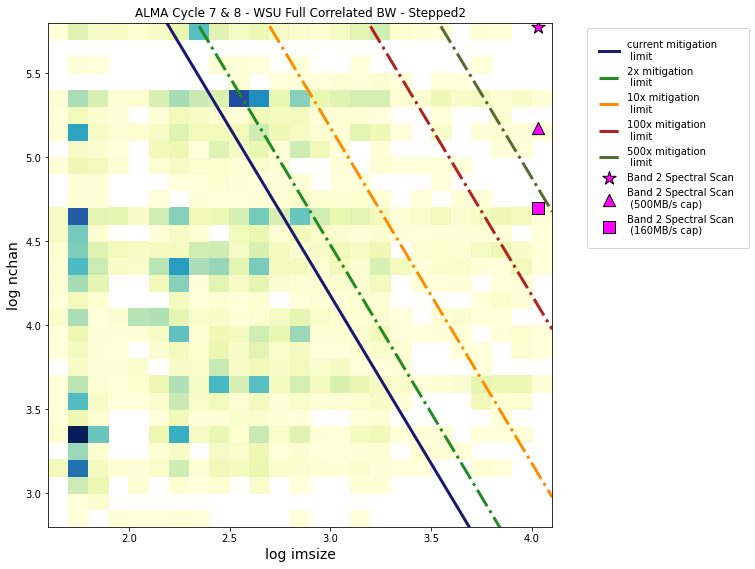

In [695]:
h, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_final_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            cycle = '7 & 8 - WSU Full Correlated BW - Stepped2')

Limit   Number    Fraction
1 3722.0 0.7261022239563012
2 4112.0 0.8021849395239953
10 4630.0 0.9032383925087788
100 5015.0 0.9783456886461178
500 5106.0 0.9960983222785798


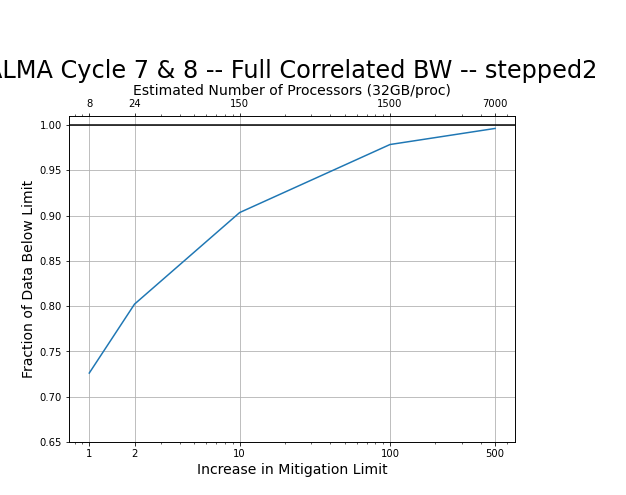

In [696]:
large_cubes.calc_cumulative_hist(h,
                     mit_limits =  np.array([1,2,10,100,500]),
                     log_imsize_range = log_imsize_range, 
                     log_imsize_step = log_imsize_step,
                     log_nchan_range = log_nchan_range,
                     log_nchan_step = log_nchan_step, cycle='7 & 8 -- Full Correlated BW -- stepped2')

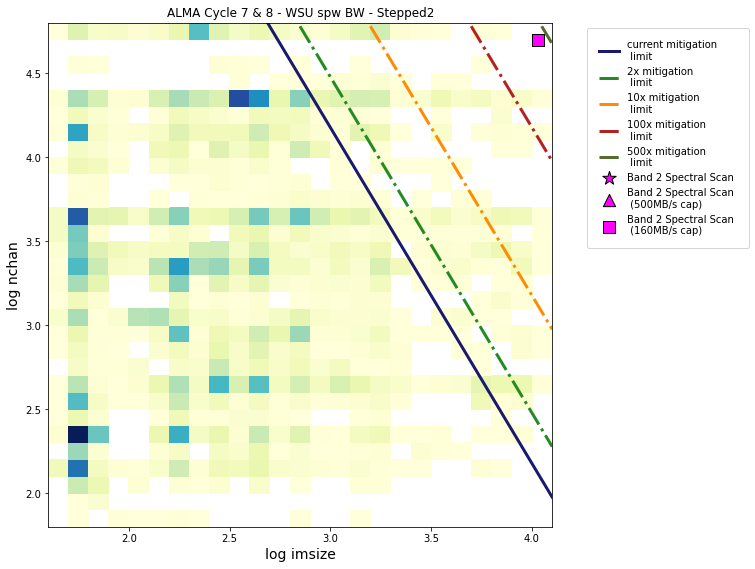

In [700]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (1.8, 4.8)
log_nchan_step = 0.1

h, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            cycle = '7 & 8 - WSU spw BW - Stepped2')

Limit   Number    Fraction
1 4630.0 0.9032383925087788
2 4754.0 0.9274287943815841
10 5015.0 0.9783456886461178
100 5123.0 0.999414748341787
500 5126.0 1.0


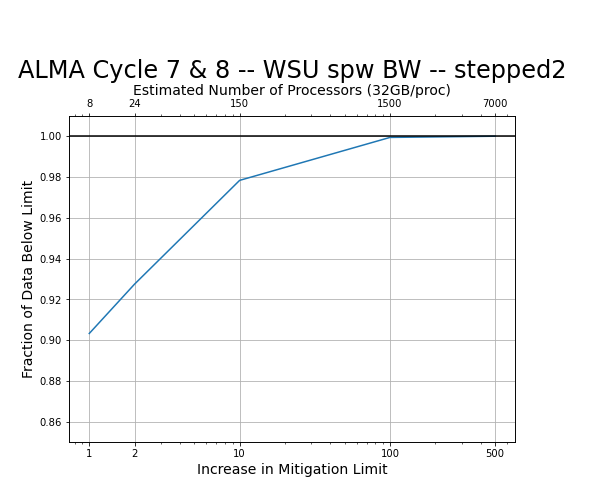

In [703]:
reload(large_cubes)
large_cubes.calc_cumulative_hist(h,
                     mit_limits =  np.array([1,2,10,100,500]),
                     log_imsize_range = log_imsize_range, 
                     log_imsize_step = log_imsize_step,
                     log_nchan_range = log_nchan_range,
                     log_nchan_step = log_nchan_step, cycle='7 & 8 -- WSU spw BW -- stepped2',
                     ylim = (0.85,1.01))

In [705]:
cycle7_cycle8_tab.columns

<TableColumns names=('obs_publisher_did','facility_name','instrument_name','obs_id','dataproduct_type','calib_level','target_name','s_ra','s_dec','s_fov','s_resolution','t_min','t_max','t_exptime','t_resolution','em_min','em_max','em_res_power','pol_states','o_ucd','access_url','access_format','proposal_id','data_rights','gal_longitude','gal_latitude','band_list','em_resolution','bandwidth','antenna_arrays','is_mosaic','spatial_resolution','frequency_support','frequency','velocity_resolution','publication_year','proposal_abstract','schedblock_name','sensitivity_10kms','cont_sensitivity_bandwidth','pwv','group_ous_uid','member_ous_uid','asdm_uid','type','scan_intent','science_observation','spatial_scale_max','qa2_passed','science_keyword','scientific_category','collections','array','points_per_fov','spw_freq','spw_specwidth','spw_nchan','spw_nchan_max','mitigated','failed_mitigation_nbin1','failed_mitigation_nbin2','ntarget','pb','cell','imsize')>

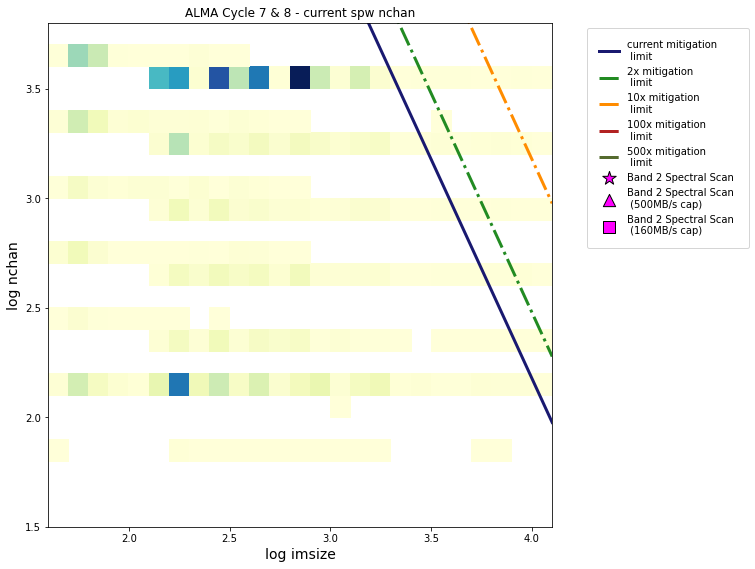

In [710]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (1.5, 3.8)
log_nchan_step = 0.1

h, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab, 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            cycle = '7 & 8 - current spw nchan')

Limit   Number    Fraction
1 94102.0 0.9889650243820414
2 94533.0 0.9934946191356987
10 95072.0 0.9991592399529174
100 95152.0 1.0
500 95152.0 1.0


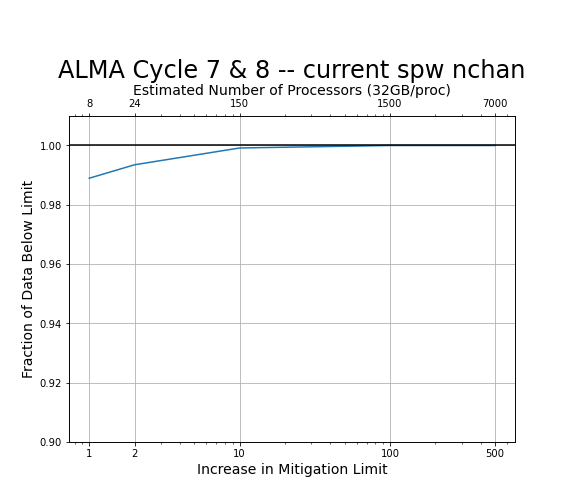

In [714]:
reload(large_cubes)
large_cubes.calc_cumulative_hist(h,
                     mit_limits =  np.array([1,2,10,100,500]),
                     log_imsize_range = log_imsize_range, 
                     log_imsize_step = log_imsize_step,
                     log_nchan_range = log_nchan_range,
                     log_nchan_step = log_nchan_step, cycle='7 & 8 -- current spw nchan',
                     ylim = (0.90,1.01))